#Perceptron


=== Loading Data ===
Initial data shape: (2125, 3)

Class distribution before processing:
label
0.0    1453
1.0     672
Name: count, dtype: int64

Data shape after k-mer generation: (2125, 4)
Class distribution after k-mer generation:
label
0.0    1453
1.0     672
Name: count, dtype: int64

=== Before SMOTE ===
X shape: (2125, 5000), y shape: (2125,)
Class distribution: Counter({np.float64(0.0): 1453, np.float64(1.0): 672})

=== After SMOTE ===
X_resampled shape: (2906, 5000), y_resampled shape: (2906,)
Class distribution: Counter({np.float64(1.0): 1453, np.float64(0.0): 1453})

=== Train/Test Split ===
Training set: (2324, 5000), Counter({np.float64(0.0): 1162, np.float64(1.0): 1162})
Test set: (582, 5000), Counter({np.float64(1.0): 291, np.float64(0.0): 291})

=== Training Enhanced Perceptron ===
Early stopping at epoch 86

=== Evaluation ===
Unique y_test: [0. 1.]
Unique y_pred: [0 1]

Performance Metrics:
Accuracy: 0.9897
Precision: 0.9798
Recall: 1.0000
F1 Score: 0.9898

Classifi

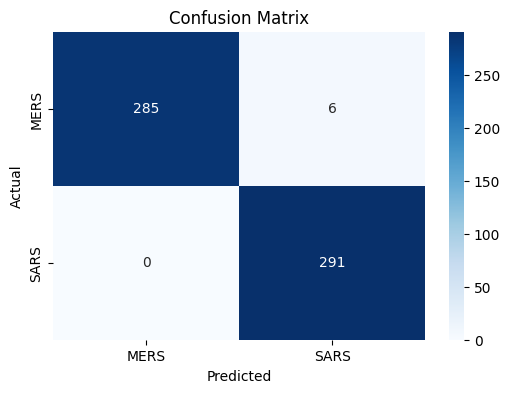

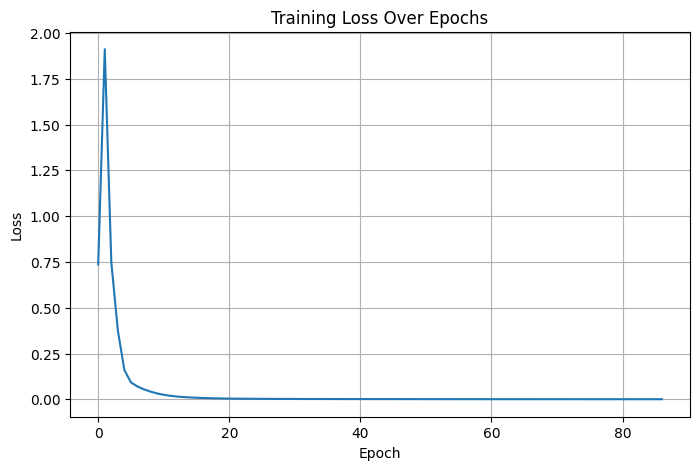


=== Cross Validation ===
Cross-validated accuracy scores: [0.87435456 0.89156627 0.87263339 0.89156627 0.91222031]
Mean accuracy: 0.89 ± 0.01

=== Top Predictive Features ===


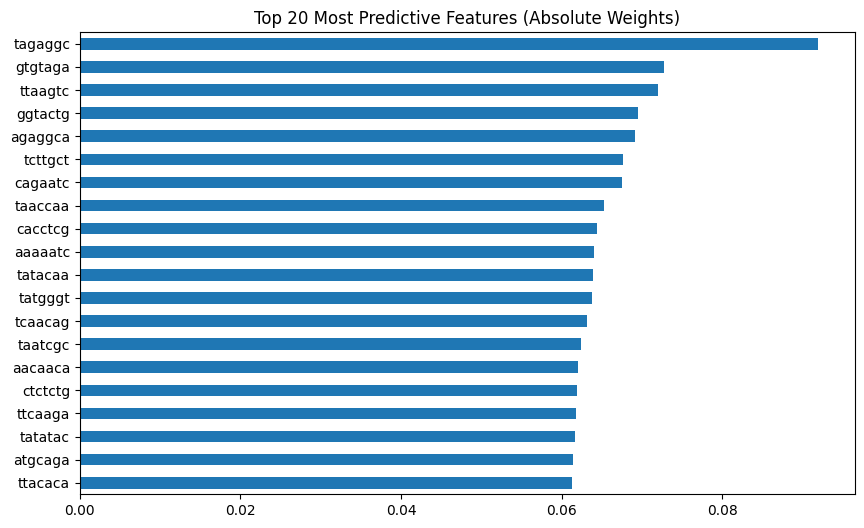

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. K-mer function with size=7
def get_kmers(sequence, size=7):
    if isinstance(sequence, str):
        sequence = re.sub(r'[^ATCG]', '', sequence.upper())
        if len(sequence) >= size:
            return ' '.join([sequence[i:i+size] for i in range(len(sequence) - size + 1)])
    return ''
# Converts each DNA sequence into overlapping substrings of length 7 (k-mers)

# 2. Load dataset
print("\n=== Loading Data ===")
df = pd.read_csv("merged_sars_mers.csv")
df.dropna(subset=['sequence', 'label'], inplace=True)
print(f"Initial data shape: {df.shape}")

# 3. Standardize label values (convert to 0 and 1)
df['label'] = df['label'].replace({0: 0, 1: 1, 0.0: 0, 1.0: 1, '0.0': 0, '1.0': 1})
print("\nClass distribution before processing:")
print(df['label'].value_counts())

# 4. Generate k-mers
df['kmers'] = df['sequence'].apply(get_kmers)

# 5. Drop rows with empty kmers
df = df[df['kmers'].str.strip() != '']
print(f"\nData shape after k-mer generation: {df.shape}")
print("Class distribution after k-mer generation:")
print(df['label'].value_counts())

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer='word', max_features=5000)  # Limit features to important ones
X = vectorizer.fit_transform(df['kmers'])
y = df['label'].values

# 7. Apply SMOTE
print("\n=== Before SMOTE ===")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print("Class distribution:", Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\n=== After SMOTE ===")
print(f"X_resampled shape: {X_resampled.shape}, y_resampled shape: {y_resampled.shape}")
print("Class distribution:", Counter(y_resampled))

# 8. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)
print("\n=== Train/Test Split ===")
print(f"Training set: {X_train.shape}, {Counter(y_train)}")
print(f"Test set: {X_test.shape}, {Counter(y_test)}")

# Convert sparse matrices to dense arrays and normalize
X_train = X_train.toarray()
X_test = X_test.toarray()

# Feature scaling
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / (X_std + 1e-8)  # Add small value to avoid division by zero
X_test = (X_test - X_mean) / (X_std + 1e-8)

# 9. Enhanced Perceptron Implementation
#Sigmoid activation → for probabilistic output

#Cross-entropy loss → for binary classification

#Weight initialization (Xavier) → for faster convergence

#arly stopping → to avoid overfitting

#Learning rate decay → for better optimization
class EnhancedPerceptron:
    def __init__(self, learning_rate=0.1, max_iter=1000, tol=1e-4, early_stopping=True): # max_iter: Maximum number of training epochs
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol # tol: Tolerance for improvement (for early stopping)
        self.early_stopping = early_stopping # early_stopping: Enables early stopping if loss doesn't improve
        self.weights = None  # Model parameters
        self.bias = None
        self.loss_history = []

    def sigmoid(self, x):  # Activation function to convert weighted sums into probabilities between 0 and 1.
        return 1 / (1 + np.exp(-x))

    def initialize_weights(self, n_features):
        # Xavier/Glorot initialization to prevent vanishing/exploding gradients.
        limit = np.sqrt(6 / (n_features + 1))
        self.weights = np.random.uniform(-limit, limit, size=n_features)
        self.bias = np.random.uniform(-limit, limit)

    def compute_loss(self, y_true, y_pred):
        # Cross-entropy loss
        epsilon = 1e-8
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y): # Main training logic. For each epoch
        , n_samples, n_features = X.shape
        .initialize_weights(n_features)

        best_weights = self.weights.copy()
        best_bias = self.bias
        best_loss = float('inf')
        no_improvement_count = 0

        for epoch in range(self.max_iter):  # Forward Pass
            linear_output = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_output)

            # Compute gradients
            errors = predictions - y
            grad_weights = np.dot(X.T, errors) / n_samples
            grad_bias = np.mean(errors)

            # Update parameters
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

            # Compute and store loss
            current_loss = self.compute_loss(y, predictions)
            self.loss_history.append(current_loss)

            # Early stopping and learning rate adjustment  'If loss doesn’t improve for 10 epochs, stop training'
            if current_loss < best_loss - self.tol:
                best_loss = current_loss
                best_weights = self.weights.copy()
                best_bias = self.bias
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if self.early_stopping and no_improvement_count >= 10:
                    print(f"Early stopping at epoch {epoch}")
                    break

            # Learning rate decay
            if epoch % 100 == 0 and epoch > 0:
                self.learning_rate *= 0.9

        self.weights = best_weights
        self.bias = best_bias

    def predict_proba(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_output)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y_true)
        return accuracy

# 10. Train & evaluate Enhanced Perceptron
print("\n=== Training Enhanced Perceptron ===")
perceptron = EnhancedPerceptron(learning_rate=0.1, max_iter=1000, early_stopping=True)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# 11. Evaluation
print("\n=== Evaluation ===")
print("Unique y_test:", np.unique(y_test))
print("Unique y_pred:", np.unique(y_pred))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['MERS', 'SARS']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['MERS', 'SARS'],
            yticklabels=['MERS', 'SARS'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot training loss
plt.figure(figsize=(8,5))
plt.plot(perceptron.loss_history)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Cross-validation implementation
print("\n=== Cross Validation ===")
def cross_validate_perceptron(X, y, folds=5):
    fold_size = len(X) // folds
    accuracies = []

    for i in range(folds):
        # Split data into train and validation sets
        start = i * fold_size
        end = (i + 1) * fold_size

        X_val = X[start:end]
        y_val = y[start:end]

        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])

        # Train and evaluate
        model = EnhancedPerceptron(learning_rate=0.1, max_iter=500)
        model.fit(X_train, y_train)
        accuracy = model.evaluate(X_val, y_val)
        accuracies.append(accuracy)

    return np.array(accuracies)

cv_scores = cross_validate_perceptron(X_resampled.toarray(), y_resampled, folds=5)
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

# Feature importance visualization
print("\n=== Top Predictive Features ===")
feature_names = vectorizer.get_feature_names_out()
important_features = pd.Series(perceptron.weights, index=feature_names)
plt.figure(figsize=(10,6))
important_features.abs().nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Most Predictive Features (Absolute Weights)')
plt.show()
